# Cardiovascular Disease

#### Escrevendo algoritmos Classificadores
#### Encontrando a acurácia e a Precisão da ferramenta

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Abrindo os dados limpos da seção anterior
df = pd.read_csv('cardio_data.csv')
df.set_index('id', inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,51,2,168,62.0,110,80,1,1,0,0,1,0
1,56,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,49,2,169,82.0,150,100,1,1,0,0,1,1
4,49,1,156,56.0,100,60,1,1,0,0,0,0


### Preparing the Training and Test set.

#### Separa os dados em treino e teste
#### Separa aleatoriamente em 70% dos dados para treino e 30% dos dados para teste

In [3]:
X = df.drop(columns = ['cardio'])
y = df['cardio']

In [4]:
from sklearn.model_selection import train_test_split
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,51,2,168,62.0,110,80,1,1,0,0,1
1,56,1,156,85.0,140,90,3,1,0,0,1
2,52,1,165,64.0,130,70,3,1,0,0,0
3,49,2,169,82.0,150,100,1,1,0,0,1
4,49,1,156,56.0,100,60,1,1,0,0,0


In [5]:
#X_train = recebe os dados de treino
#X_test = recebe os dados de teste (30%)
#y_train = classes associadas aos dados de treino
#Y-test = classes associadas aos dados de teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 9)

In [6]:
X_train.shape, y_train.shape

((41475, 11), (41475,))

In [7]:
X_test.shape, y_test.shape

((17775, 11), (17775,))

### Criando modelos

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [9]:
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
naive = GaussianNB()

In [10]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "Naive bayes" : naive
         }

scores= { }

### Treina o algoritmo e gera o modelo

In [11]:
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

### Performance Metrics

In [12]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
KNN,0.711955
Naive bayes,0.705373
Random forest,0.684838
Decision tree,0.613558


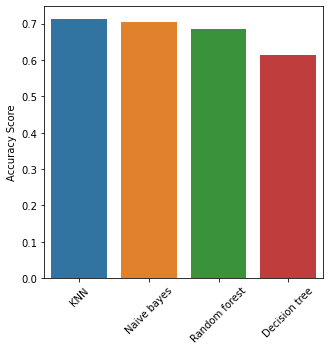

In [13]:
plt.figure(figsize=(5,5))
sns.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45);

### Prevendo resultados com o melhor modelo

In [21]:
y_test[400:403]

id
49748    1
51997    0
11769    1
Name: cardio, dtype: int64

In [24]:
X_test[400:403]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
49748,60,1,167,80.0,150,90,1,1,0,0,1
51997,50,1,158,81.0,130,90,2,2,0,1,1
11769,51,2,170,72.0,140,90,1,1,0,0,1


In [34]:
previsoes = knn.predict(X_test[400:403])
previsoes

array([1, 1, 1], dtype=int64)

### Fazendo Cross-Validation
#### Cross-Validation com 5 Folds
FAZER CROSS VALIDATION APÓS O TRAIN TEST SPLIT EM CIMA DO TREINO
* https://scikit-learn.org/stable/modules/cross_validation.html

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
scores_dtc = cross_val_score(dtc, X, y, cv=5, scoring='accuracy')
scores_ran = cross_val_score(ran, X, y, cv=5, scoring='accuracy')
scores_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores_naive = cross_val_score(naive, X, y, cv=5, scoring='accuracy')

In [19]:
print('Decision Tree:', scores_dtc.mean())
print('Random Forest:', scores_ran.mean())
print('KNeighbors:', scores_knn.mean())
print('Naive Bayes:', scores_naive.mean())

Decision Tree: 0.6079662447257383
Random Forest: 0.686464135021097
KNeighbors: 0.7156793248945148
Naive Bayes: 0.7072911392405064


#### Após o Cross Validation, o KNN continuou a ser o modelo com melhor acurácia. A acurácia do KNN, inclusive, melhorou em relação ao modelo original.